## Лабораторная работа 3

## 1. Предобработка данных
## Загрузка библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     

## Загрузка данных

In [2]:

df = pd.read_csv("genres_v2.csv",low_memory = False)
# To display the top 5 rows 
df.head(5)  

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1       0.4200        0.0598   
1         0.719   0.493    8    -7.230     1       0.0794        0.4010   
2         0.850   0.893    5    -4.783     1       0.0623        0.0138   
3         0.476   0.781    0    -4.710     1       0.1030        0.0237   
4         0.798   0.624    2    -7.668     1       0.2930        0.2170   

   instrumentalness  liveness  valence  ...                      id  \
0          0.013400    0.0556   0.3890  ...  2Vc6NJ9PW9gD9q343XFRKx   
1          0.000000    0.1180   0.1240  ...  7pgJBLVz5VmnL7uGHmRj6p   
2          0.000004    0.3720   0.0391  ...  0vSWgAlfpye0WCGeNmuNhy   
3          0.000000    0.1140   0.1750  ...  0VSXnJqQkwuH2ei1nOQ1nu   
4          0.000000    0.1660   0.5910  ...  4jCeguq9rMTlbMmPHuO7S3   

                                    uri  \
0  spotify:track:2Vc6NJ9PW9gD9q343XFRKx   
1  spotify:track:7pgJBLVz5VmnL7uGHmRj6p   
2  spotify:track:0vSWgAlfpye0WCGeNmuNhy   
3  spotify:track:0VSXnJqQkwuH2ei1nOQ1nu   
4  spotify:track:4jCeguq9rMTlbMmPHuO7S3   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...   
1  https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...   
2  https://api.spotify.com/v1/tracks/0vSWgAlfpye0...   
3  https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...   
4  https://api.spotify.com/v1/tracks/4jCeguq9rMTl...   

                                        analysis_url duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/2Vc6...      124539   
1  https://api.spotify.com/v1/audio-analysis/7pgJ...      224427   
2  https://api.spotify.com/v1/audio-analysis/0vSW...       98821   
3  https://api.spotify.com/v1/audio-analysis/0VSX...      123661   
4  https://api.spotify.com/v1/audio-analysis/4jCe...      123298   

  time_signature      genre                                      song_name  \
0              4  Dark Trap                            Mercury: Retrograde   
1              4  Dark Trap                                      Pathology   
2              4  Dark Trap                                       Symbiote   
3              3  Dark Trap  ProductOfDrugs (Prod. The Virus and Antidote)   
4              4  Dark Trap                                          Venom   

  Unnamed: 0 title  
0        NaN   NaN  
1        NaN   NaN  
2        NaN   NaN  
3        NaN   NaN  
4        NaN   NaN  

[5 rows x 22 columns]

## Удаление нерелевантных столбцов
Удаляем следующие столбцы: id, uri, track_href, analysis_url, Unnamed:0, title,type

In [3]:
df = df.drop(['id', 'uri', 'track_href', 'analysis_url', 'Unnamed: 0', 'title','type','song_name','time_signature'], axis=1)
df.head(5)

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1       0.4200        0.0598   
1         0.719   0.493    8    -7.230     1       0.0794        0.4010   
2         0.850   0.893    5    -4.783     1       0.0623        0.0138   
3         0.476   0.781    0    -4.710     1       0.1030        0.0237   
4         0.798   0.624    2    -7.668     1       0.2930        0.2170   

   instrumentalness  liveness  valence    tempo  duration_ms      genre  
0          0.013400    0.0556   0.3890  156.985       124539  Dark Trap  
1          0.000000    0.1180   0.1240  115.080       224427  Dark Trap  
2          0.000004    0.3720   0.0391  218.050        98821  Dark Trap  
3          0.000000    0.1140   0.1750  186.948       123661  Dark Trap  
4          0.000000    0.1660   0.5910  147.988       123298  Dark Trap

## Удаление дубликатов

In [4]:
df.shape

(42305, 13)

In [5]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (4180, 13)


В базе данных 4140 строк-дубликатов, удалим их

In [6]:
df = df.drop_duplicates()
df.shape

(38125, 13)

Проверим наличие пропущенных значений

In [7]:
print(df.isnull().sum())

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
genre               0
dtype: int64


Пропусков нет

## Нормализация

In [8]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
#print(df)

df["key"] = mms.fit_transform(df[["key"]])
df["loudness"] = mms.fit_transform(df[["loudness"]])
df["tempo"] = mms.fit_transform(df[["tempo"]])
df["duration_ms"] = mms.fit_transform(df[["duration_ms"]])

df.head(5)


danceability  energy       key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814  0.181818  0.712039     1       0.4200        0.0598   
1         0.719   0.493  0.727273  0.715710     1       0.0794        0.4010   
2         0.850   0.893  0.454545  0.782742     1       0.0623        0.0138   
3         0.476   0.781  0.000000  0.784742     1       0.1030        0.0237   
4         0.798   0.624  0.181818  0.703712     1       0.2930        0.2170   

   instrumentalness  liveness  valence     tempo  duration_ms      genre  
0          0.013400    0.0556   0.3890  0.610006     0.111487  Dark Trap  
1          0.000000    0.1180   0.1240  0.351848     0.224043  Dark Trap  
2          0.000004    0.3720   0.0391  0.986200     0.082507  Dark Trap  
3          0.000000    0.1140   0.1750  0.794595     0.110497  Dark Trap  
4          0.000000    0.1660   0.5910  0.554579     0.110088  Dark Trap

Построим тепловую карту

## Определение выбросов

In [9]:
df.shape


(38125, 13)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'danceability'),
  Text(1, 0, 'energy'),
  Text(2, 0, 'key'),
  Text(3, 0, 'loudness'),
  Text(4, 0, 'mode'),
  Text(5, 0, 'speechiness'),
  Text(6, 0, 'acousticness'),
  Text(7, 0, 'instrumentalness'),
  Text(8, 0, 'liveness'),
  Text(9, 0, 'valence'),
  Text(10, 0, 'tempo'),
  Text(11, 0, 'duration_ms')])

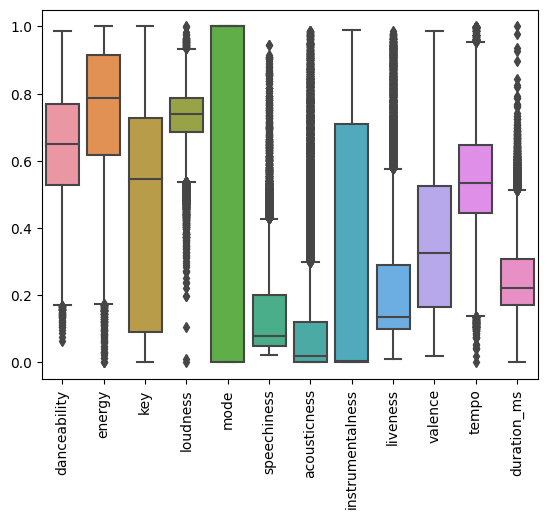

In [10]:
sns.boxplot(data=df)
plt.xticks(rotation=90)

In [11]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

danceability        0.239000
energy              0.296000
key                 0.636364
loudness            0.099110
mode                1.000000
speechiness         0.151800
acousticness        0.119040
instrumentalness    0.711000
liveness            0.191100
valence             0.361000
tempo               0.204050
duration_ms         0.137327
dtype: float64


In [12]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

C:\Users\artyo\AppData\Local\Temp\ipykernel_14908\4147643536.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


(28997, 13)

danceability    energy       key  loudness      mode  \
danceability          1.000000 -0.386779 -0.017290 -0.238635  0.086944   
energy               -0.386779  1.000000  0.050164  0.524286 -0.043924   
key                  -0.017290  0.050164  1.000000 -0.011822 -0.259430   
loudness             -0.238635  0.524286 -0.011822  1.000000 -0.003846   
mode                  0.086944 -0.043924 -0.259430 -0.003846  1.000000   
speechiness           0.249667 -0.180057 -0.027445  0.065968  0.052635   
acousticness          0.188482 -0.362939 -0.002289 -0.114029 -0.010816   
instrumentalness     -0.087377  0.307288  0.069179 -0.223235 -0.026712   
liveness             -0.210743  0.189687 -0.011297  0.160217 -0.002942   
valence               0.368950 -0.017085  0.033250  0.086180  0.026061   
tempo                -0.158097 -0.027120 -0.016149  0.188207 -0.004451   
duration_ms          -0.057805  0.286647  0.071001 -0.134392 -0.049575   

                  speechiness  acousticness  instrumentalness  liveness  \
danceability         0.249667      0.188482         -0.087377 -0.210743   
energy              -0.180057     -0.362939          0.307288  0.189687   
key                 -0.027445     -0.002289          0.069179 -0.011297   
loudness             0.065968     -0.114029         -0.223235  0.160217   
mode                 0.052635     -0.010816         -0.026712 -0.002942   
speechiness          1.000000      0.242177         -0.389709  0.056495   
acousticness         0.242177      1.000000         -0.319422 -0.051328   
instrumentalness    -0.389709     -0.319422          1.000000 -0.078514   
liveness             0.056495     -0.051328         -0.078514  1.000000   
valence              0.252472      0.163770         -0.259871 -0.026519   
tempo                0.201711      0.078484         -0.218812  0.039821   
duration_ms         -0.307412     -0.271110          0.597296 -0.085698   

                   valence     tempo  duration_ms  
danceability      0.368950 -0.158097    -0.057805  
energy           -0.017085 -0.027120     0.286647  
key               0.033250 -0.016149     0.071001  
loudness          0.086180  0.188207    -0.134392  
mode              0.026061 -0.004451    -0.049575  
speechiness       0.252472  0.201711    -0.307412  
acousticness      0.163770  0.078484    -0.271110  
instrumentalness -0.259871 -0.218812     0.597296  
liveness         -0.026519  0.039821    -0.085698  
valence           1.000000  0.078867    -0.176574  
tempo             0.078867  1.000000    -0.154694  
duration_ms      -0.176574 -0.154694     1.000000

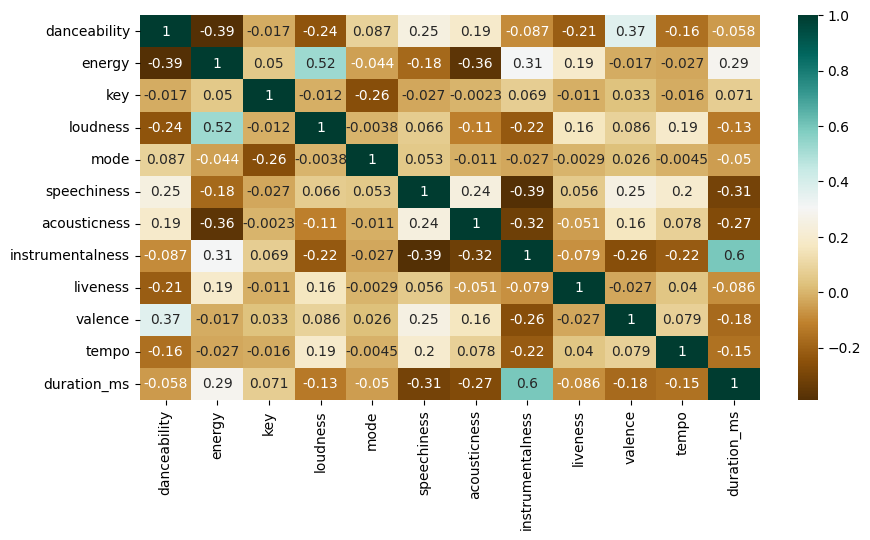

In [13]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import sklearn as sk
import numpy as np



Text(0.5, 1.0, 'Hisogram plot')

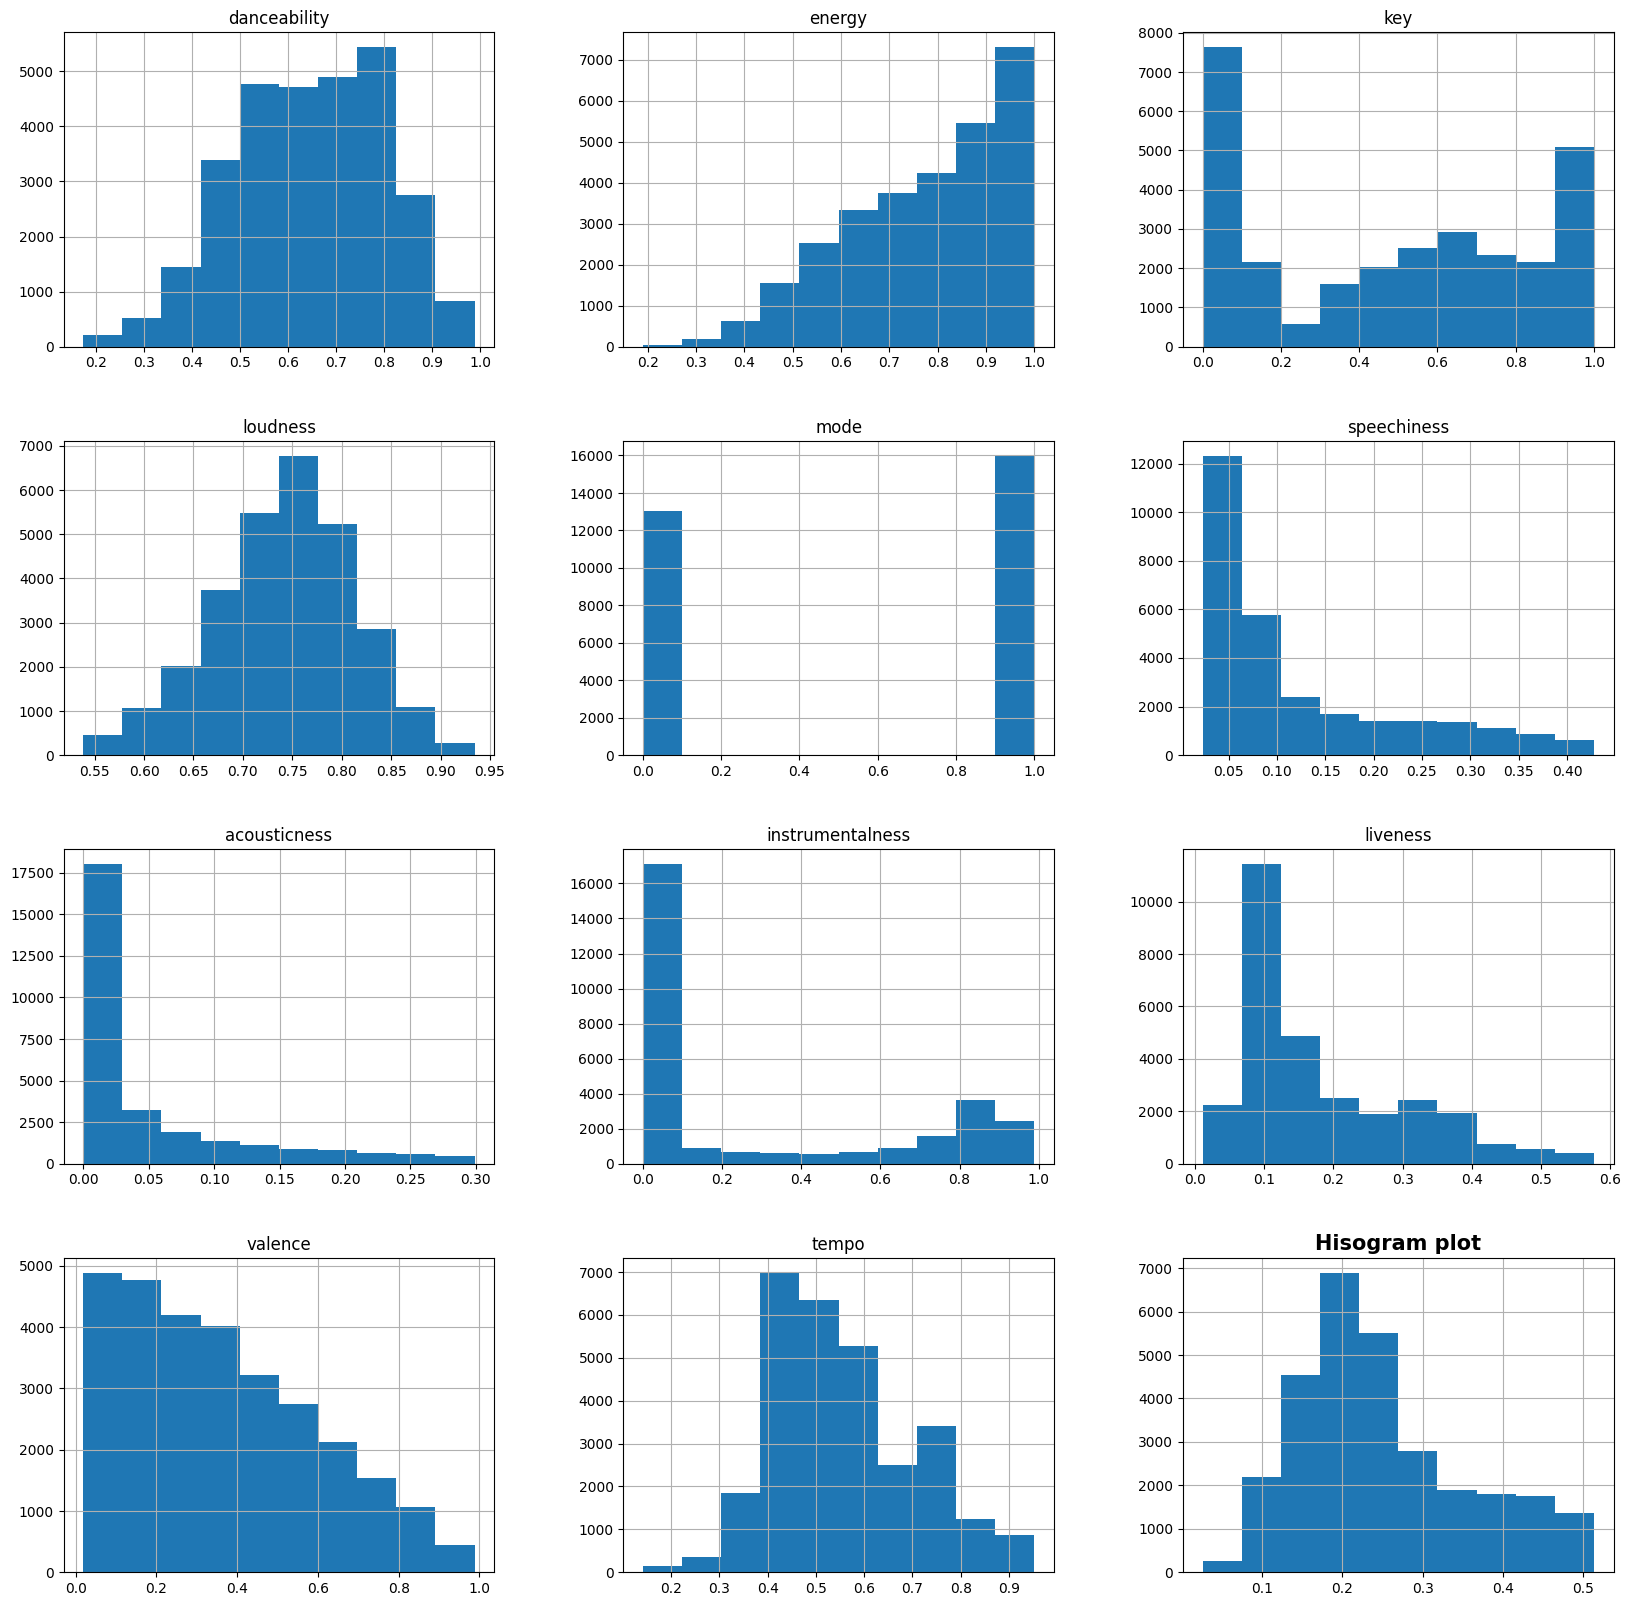

In [15]:
df.hist(figsize=(20,20))
plt.title("Hisogram plot", size=15, weight='bold')

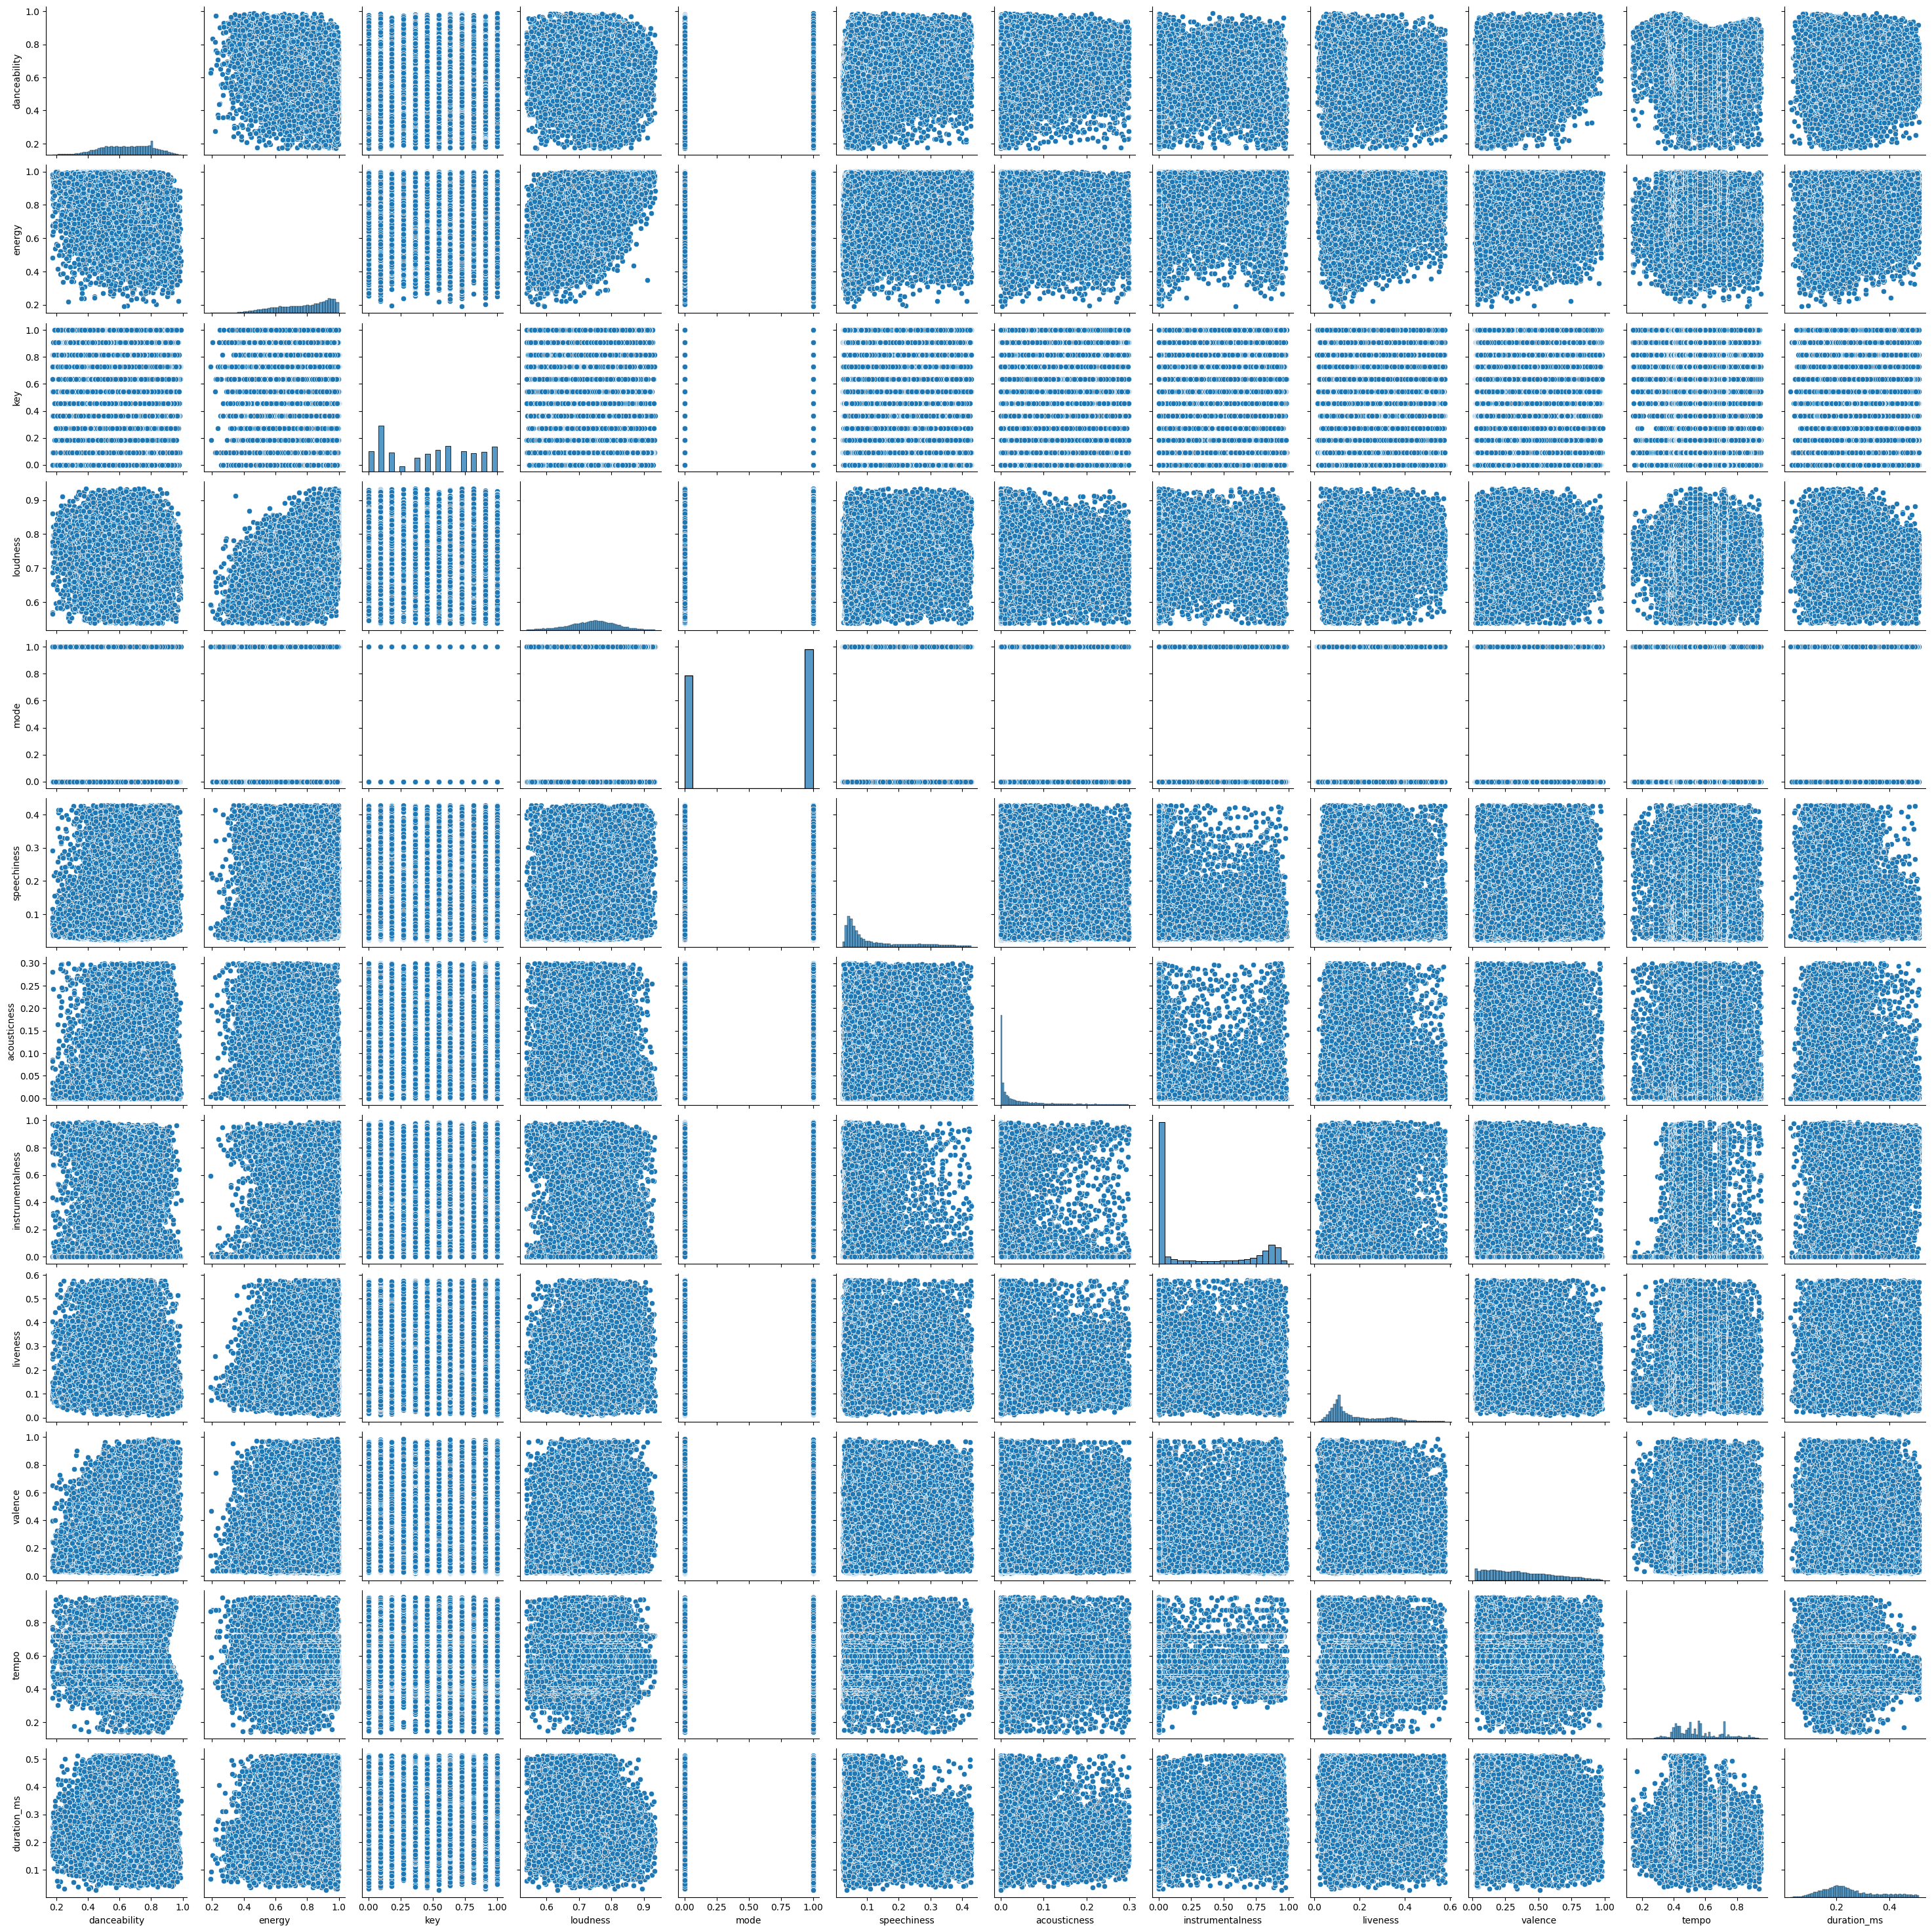

In [16]:
# plot_number = 0 
# for feature_name in df.columns:
#     plot_number += 1
#     plt.subplot(4,4,plot_number)
#     plt.hist(df[feature_name])
sns.pairplot(df)

## Разбиение данных

In [52]:
from sklearn.metrics import classification_report, confusion_matrix
# Y = df["genre"]
# Y = df["genre"].map(
#       {'Dark Trap':0,'Emo':1,'Hiphop':2,'Pop':3,'Rap':4,'RnB':5,'Trap Metal': 6,'Underground Rap':4,
#       'dnb':7,'hardstyle':8,'psytrance':9,'techhouse':10,'techno':10,'trance':9,'trap':0 }).astype(int)
# Y = df["genre"].map(
# {'Dark Trap':0,'Emo':1,'Hiphop':2,'Pop':3,'Rap':4,'RnB':5,'Trap Metal': 6,'Underground Rap':7,
# 'dnb':8,'hardstyle':9,'psytrance':10,'techhouse':11,'techno':12,'trance':13,'trap':14 }).astype(int)
df_binary = df[df.columns[[1,3]]]
X = df[df.columns[[0,1,2,4,5,6,7,8,9,10,11]]]
Y = df_binary["loudness"]
print(Y)
print(X)
X_train, X_test, y_train, y_test = train_test_split(
     X, Y, test_size=0.33)


    

0        0.712039
3        0.784742
4        0.703712
5        0.604356
6        0.799753
           ...   
42298    0.795069
42300    0.772743
42302    0.828791
42303    0.782906
42304    0.753184
Name: loudness, Length: 28997, dtype: float64
       danceability  energy       key  mode  speechiness  acousticness  \
0             0.831   0.814  0.181818     1       0.4200      0.059800   
3             0.476   0.781  0.000000     1       0.1030      0.023700   
4             0.798   0.624  0.181818     1       0.2930      0.217000   
5             0.721   0.568  0.000000     1       0.4140      0.045200   
6             0.718   0.668  0.727273     1       0.1370      0.025400   
...             ...     ...       ...   ...          ...           ...   
42298         0.502   0.991  0.454545     0       0.2400      0.005540   
42300         0.528   0.693  0.363636     1       0.0304      0.031500   
42302         0.361   0.821  0.727273     1       0.0505      0.026000   
42303         0.

## Линейная регрессия

Coefficient:  [ 2.86884969e-03  2.82401709e-01 -2.35219010e-03  2.69885242e-04
  1.67891769e-03 -2.87885426e-02 -6.56844841e-02 -6.62313306e-03
 -5.16665352e-03  6.02397715e-02 -7.14384142e-02] 

Mean squared error: 0.00
Coefficient of determination: 0.46


<function matplotlib.pyplot.show(close=None, block=None)>

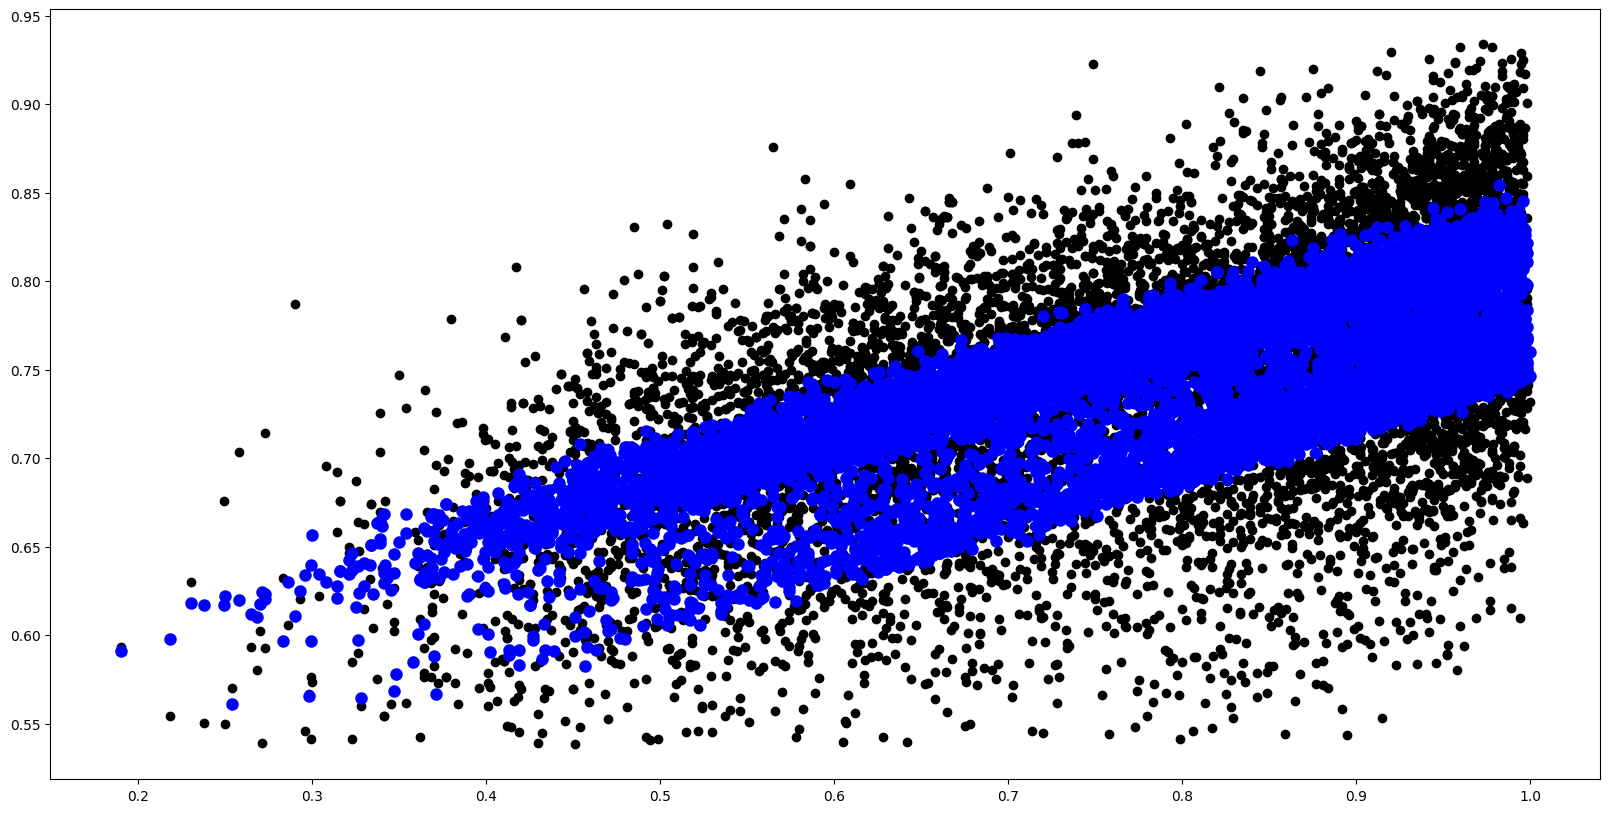

In [55]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train,y_train)
y_pred = lin_reg.predict(X_test)

print("Coefficient: ", lin_reg.coef_,"\n")
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred))
plt.figure(figsize=(20,10))
#sns.scatterplot(x = 'energy',y = 'loudness', data = X_test,color="black")
plt.scatter(X_test["energy"],y_test,color="black")
plt.scatter(X_test["energy"],y_pred,color="blue",linewidth=3)
plt.show


## Дерево решений

Mean squared error: 0.00
Coefficient of determination: 0.52


<function matplotlib.pyplot.show(close=None, block=None)>

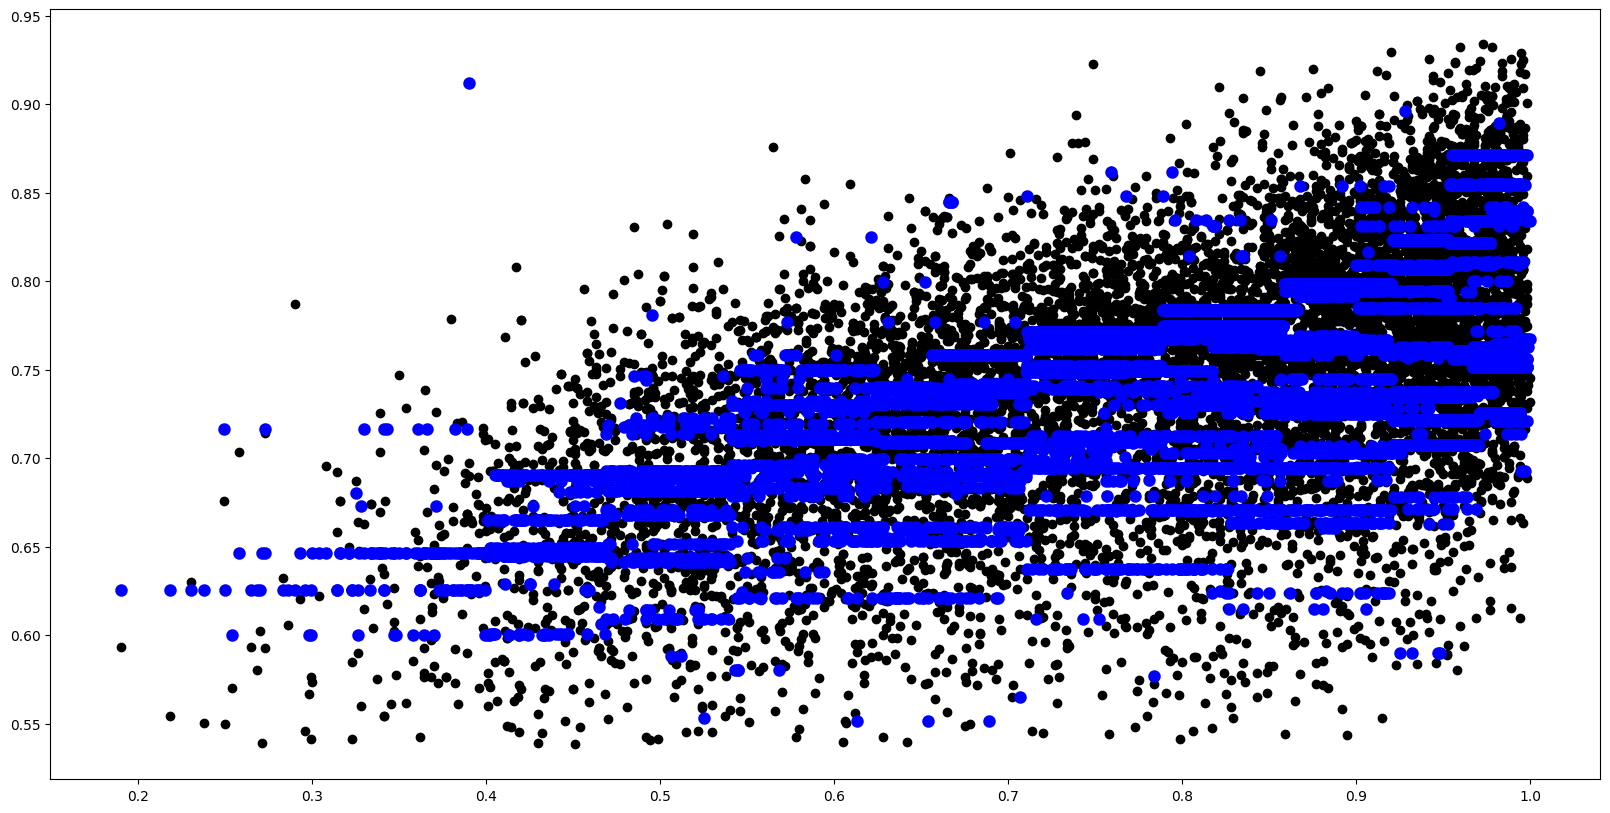

In [56]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth=8)
dtr.fit(X_train,y_train)
y_pred = dtr.predict(X_test)


print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred))
plt.figure(figsize=(20,10))
#sns.scatterplot(x = 'energy',y = 'loudness', data = X_test,color="black")
plt.scatter(X_test["energy"],y_test,color="black")
plt.scatter(X_test["energy"],y_pred,color="blue",linewidth=3)
plt.show

## LASSO

Mean squared error: 0.00
Coefficient of determination: -0.00


<function matplotlib.pyplot.show(close=None, block=None)>

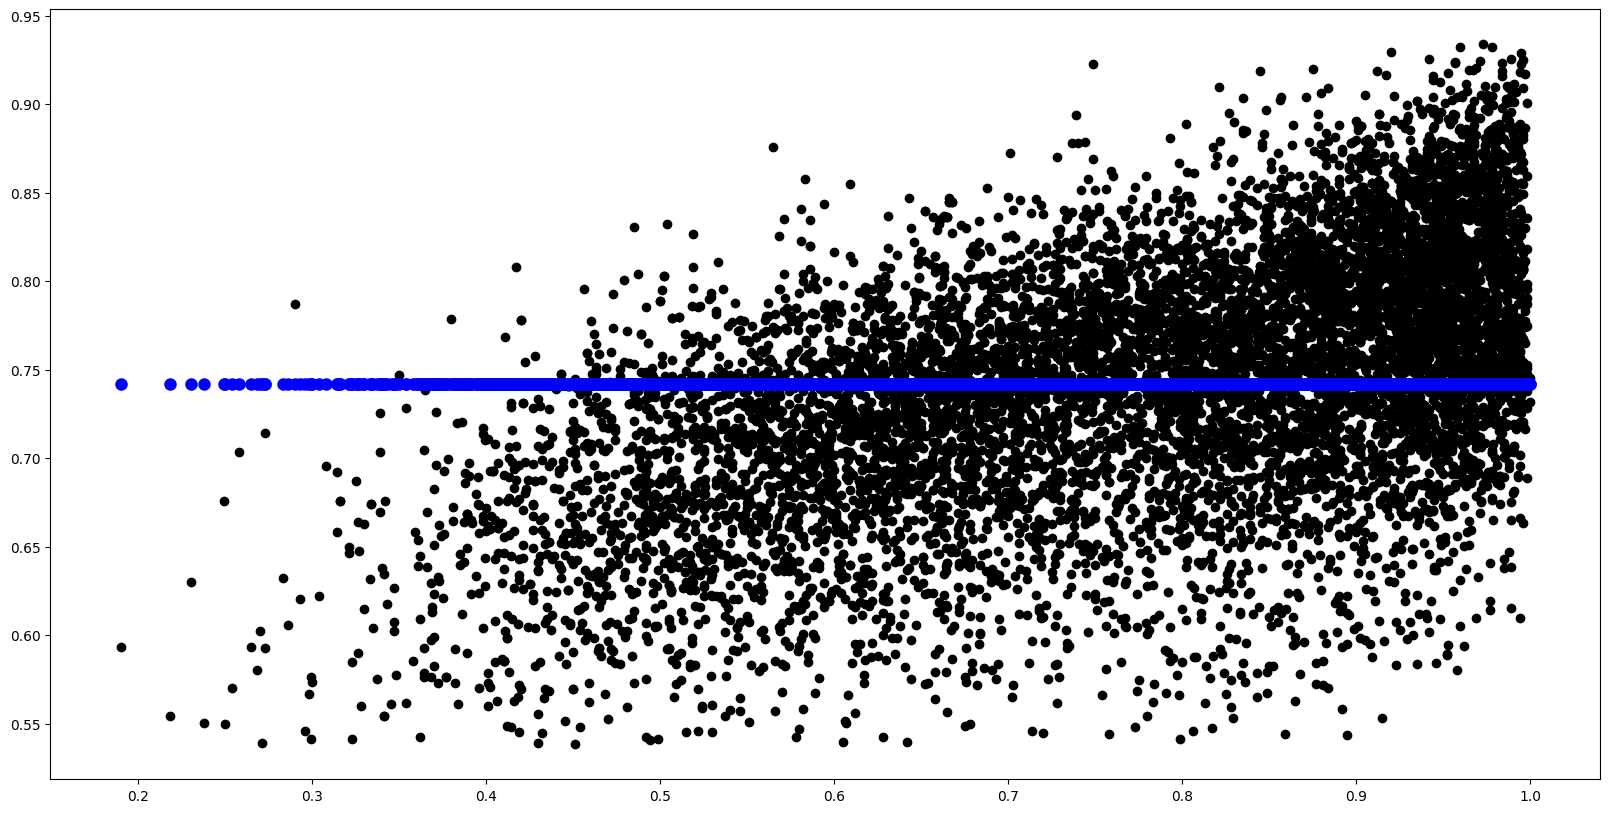

In [57]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)


print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred))
plt.figure(figsize=(20,10))
#sns.scatterplot(x = 'energy',y = 'loudness', data = X_test,color="black")
plt.scatter(X_test["energy"],y_test,color="black")
plt.scatter(X_test["energy"],y_pred,color="blue",linewidth=3)
plt.show

## Ридж-регрессия

Mean squared error: 0.00
Coefficient of determination: 0.46


<function matplotlib.pyplot.show(close=None, block=None)>

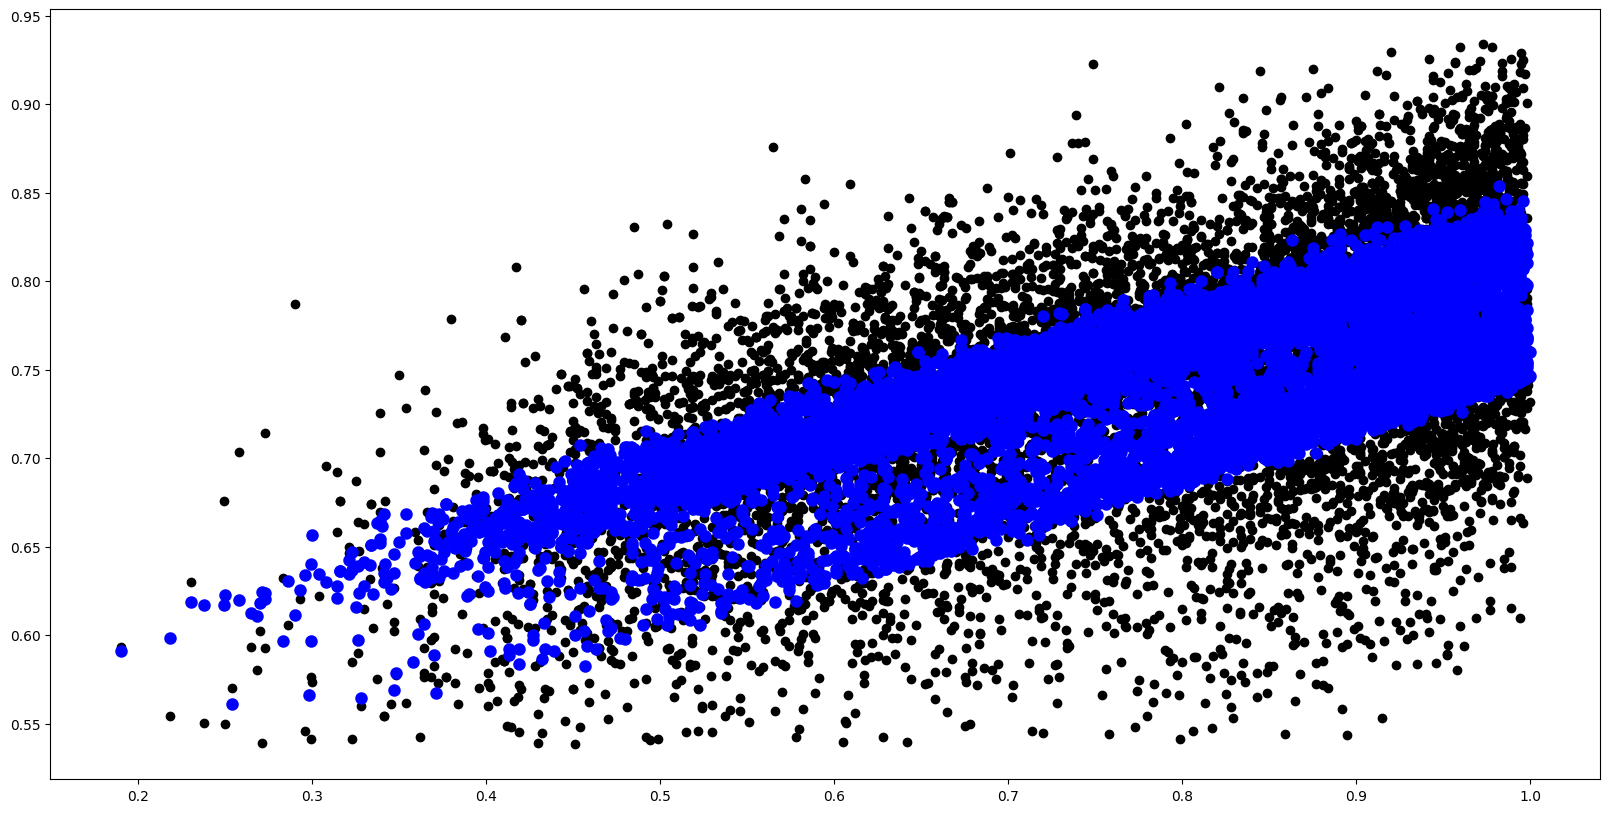

In [58]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1)
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)


print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred))
plt.figure(figsize=(20,10))
#sns.scatterplot(x = 'energy',y = 'loudness', data = X_test,color="black")
plt.scatter(X_test["energy"],y_test,color="black")
plt.scatter(X_test["energy"],y_pred,color="blue",linewidth=3)
plt.show

## XGboost

In [59]:
import xgboost as xgb

model = xgb.XGBRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred))
plt.figure(figsize=(20,10))
#sns.scatterplot(x = 'energy',y = 'loudness', data = X_test,color="black")
plt.scatter(X_test["energy"],y_test,color="black")
plt.scatter(X_test["energy"],y_pred,color="blue",linewidth=3)
plt.show



Mean squared error: 0.00
Coefficient of determination: 0.59


<function matplotlib.pyplot.show(close=None, block=None)>

## ElasticNet

Mean squared error: 0.00
Coefficient of determination: -0.00


<function matplotlib.pyplot.show(close=None, block=None)>

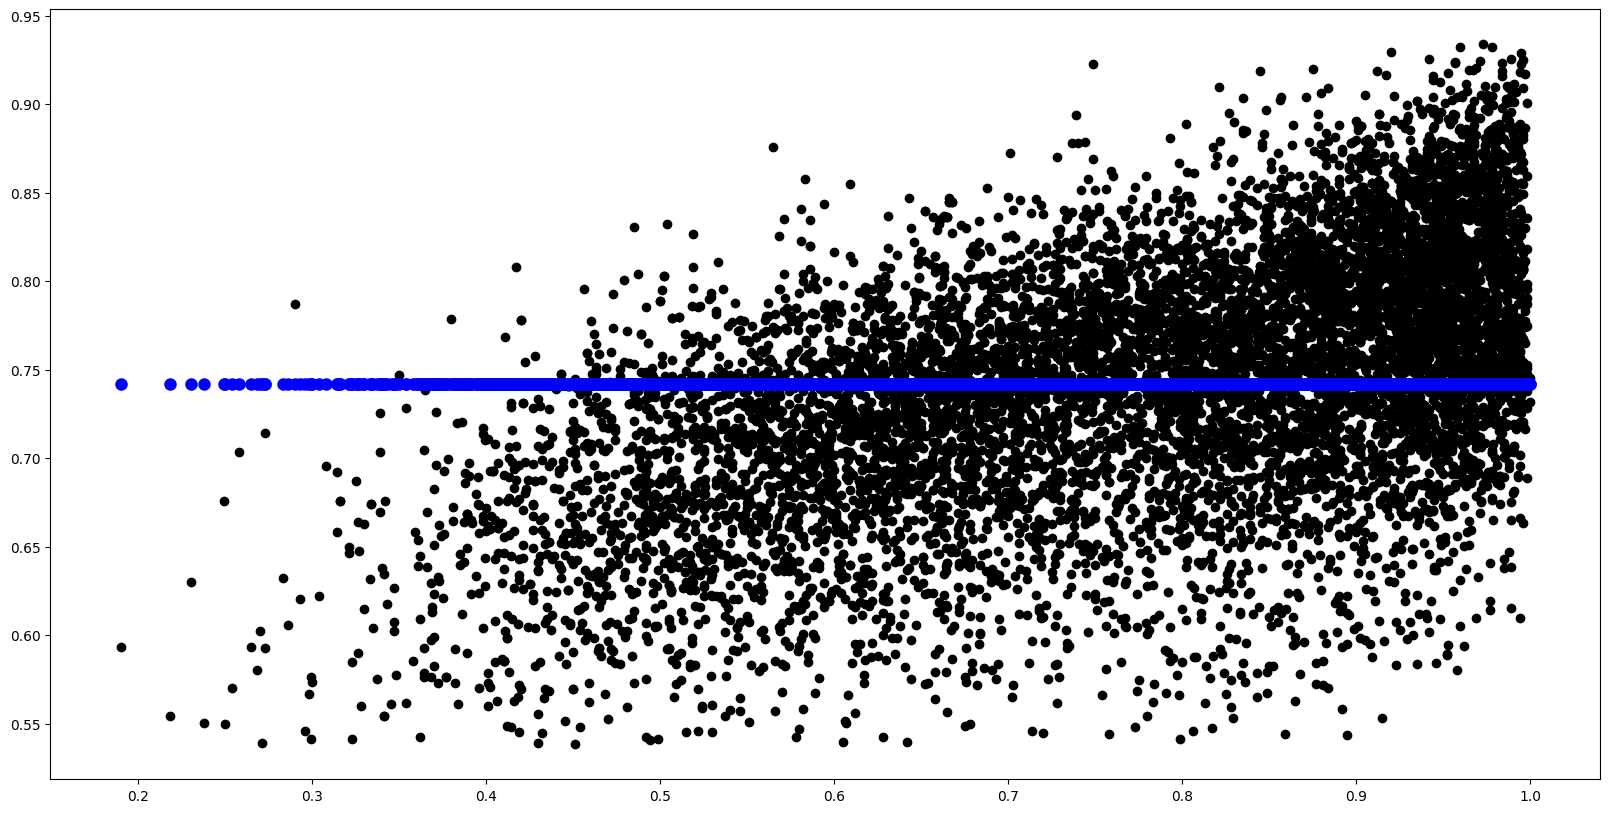

In [60]:
from sklearn.linear_model import ElasticNet

net = ElasticNet(random_state = 0)
net.fit(X_train,y_train)
y_pred = net.predict(X_test)


print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred))
plt.figure(figsize=(20,10))
#sns.scatterplot(x = 'energy',y = 'loudness', data = X_test,color="black")
plt.scatter(X_test["energy"],y_test,color="black")
plt.scatter(X_test["energy"],y_pred,color="blue",linewidth=3)
plt.show

In [62]:
from sklearn.metrics import classification_report, confusion_matrix
# Y = df["genre"]
# Y = df["genre"].map(
#       {'Dark Trap':0,'Emo':1,'Hiphop':2,'Pop':3,'Rap':4,'RnB':5,'Trap Metal': 6,'Underground Rap':4,
#       'dnb':7,'hardstyle':8,'psytrance':9,'techhouse':10,'techno':10,'trance':9,'trap':0 }).astype(int)
# Y = df["genre"].map(
# {'Dark Trap':0,'Emo':1,'Hiphop':2,'Pop':3,'Rap':4,'RnB':5,'Trap Metal': 6,'Underground Rap':7,
# 'dnb':8,'hardstyle':9,'psytrance':10,'techhouse':11,'techno':12,'trance':13,'trap':14 }).astype(int)
df_binary = df[["energy", "loudness"]]
X = np.array(df_binary["energy"]).reshape(-1,1)
Y = np.array(df_binary["loudness"]).reshape(-1,1)
print(Y)
print(X)
X_train, X_test, y_train, y_test = train_test_split(
     X, Y, test_size=0.33)

[[0.71203945]
 [0.78474182]
 [0.70371182]
 ...
 [0.82879058]
 [0.78290645]
 [0.7531845 ]]
[[0.814]
 [0.781]
 [0.624]
 ...
 [0.821]
 [0.921]
 [0.945]]


Coefficient:  [[0.22805802]] 

Mean squared error: 0.00
Coefficient of determination: 0.26


<function matplotlib.pyplot.show(close=None, block=None)>

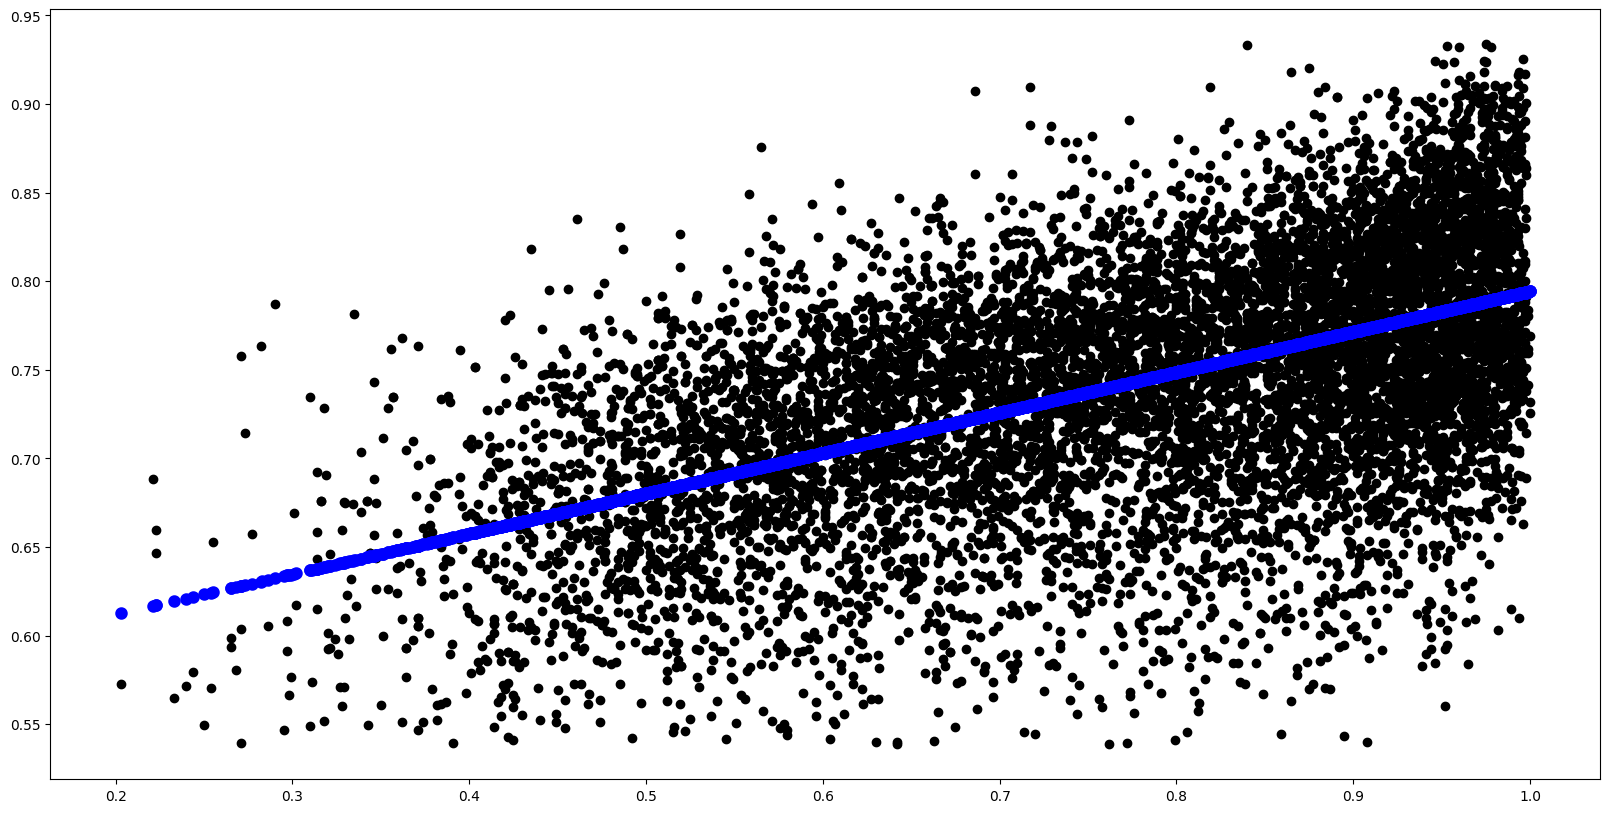

In [63]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train,y_train)
y_pred = lin_reg.predict(X_test)

print("Coefficient: ", lin_reg.coef_,"\n")
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred))
plt.figure(figsize=(20,10))
#sns.scatterplot(x = 'energy',y = 'loudness', data = X_test,color="black")
plt.scatter(X_test,y_test,color="black")
plt.scatter(X_test,y_pred,color="blue",linewidth=3)
plt.show